# Classification using key features

These features will be extracted from audio files :
+ Tempo
+ Chroma Energy Normalized (CENS)
+ Harmonics and Perceptrual
+ Mel-Frequency Cepstral Coefficients
+ Spectral Centroid
+ Spectral Contrast
+ Spectral Rolloff
+ Zero Crossing Rate

In [55]:
from playsound import playsound
test_file = '../data/chunk_audio_preview/metal_preview.wav'
y, sr = librosa.load(test_file, sr=None)
#playsound(test_file)

# Explanation and visualization of the differents features

### Tempo (Beats per Minute)

In [88]:
import matplotlib.pyplot as plt
import librosa
import librosa.display as lplt

tempo, _ = librosa.beat.beat_track(y)
print(f"Estimated tempo : {round(tempo)} BPM")


Estimated tempo : 112 BPM


## Chroma features

Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.
### Chroma Energy Normalized (CENS)

CENS features are robust to dynamics, timbre and articulation.

(12, 173)


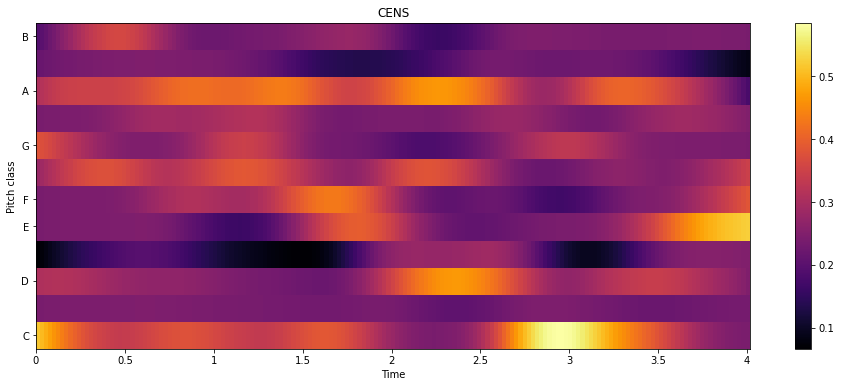

In [57]:
chroma_cens = librosa.feature.chroma_cens(y, sr=sr)
print(chroma_cens.shape)

plt.figure(figsize=(16,6))
lplt.specshow(chroma_cens, sr=sr, x_axis='time', y_axis='chroma', cmap='inferno')
plt.colorbar()
plt.title("CENS")
_ = plt.show()

### Chromagram

(12, 173)


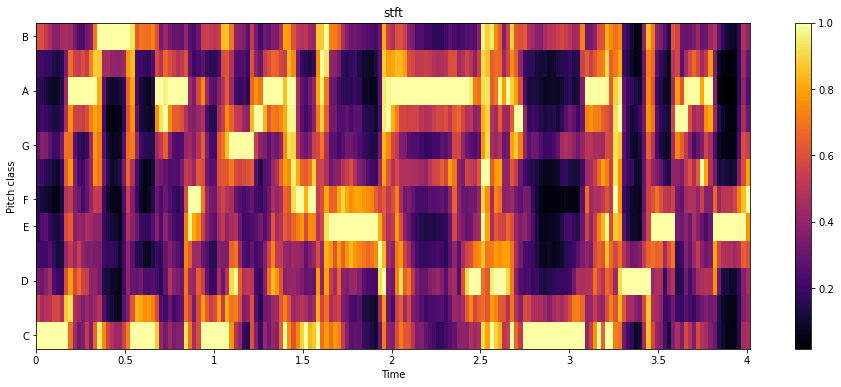

In [58]:
chroma_stft = librosa.feature.chroma_stft(y, sr=sr)
print(chroma_stft.shape)

plt.figure(figsize=(16,6))
lplt.specshow(chroma_stft, sr=sr, x_axis='time', y_axis='chroma', cmap='inferno')
plt.colorbar()
plt.title("stft")
_ = plt.show()

### Harmonics and Perceptrual

+ Harmonics are characteristichs that human years can't distinguish (represents the sound color)
+ Perceptrual understanding shock wave represents the sound rhythm and emotion

(88200,) (88200,)


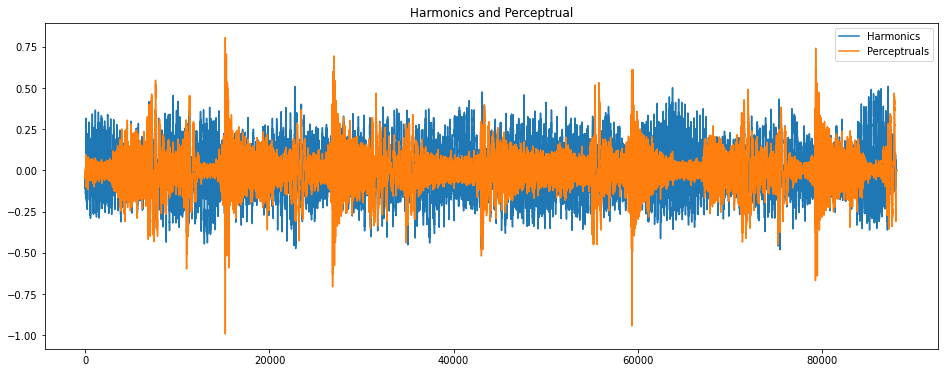

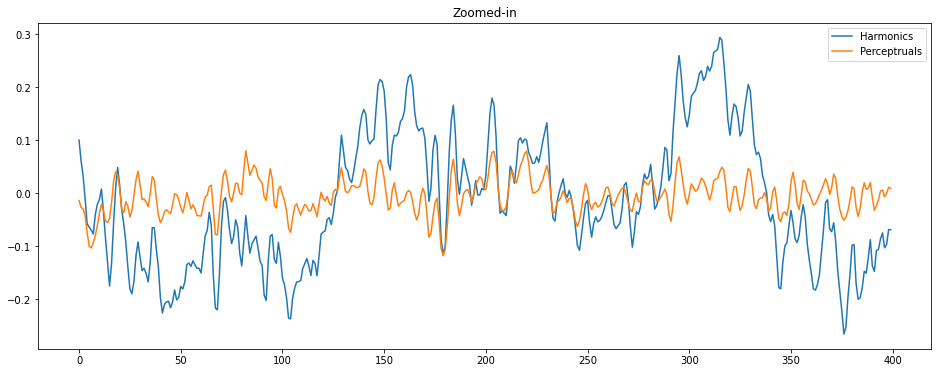

In [59]:
y_harm, y_perc = librosa.effects.hpss(y)
print(y_harm.shape, y_perc.shape)

plt.figure(figsize=(16, 6))
plt.title("Harmonics and Perceptrual")
plt.plot(y_harm)
plt.plot(y_perc)
plt.legend(["Harmonics","Perceptruals"])
_ = plt.show()


plt.figure(figsize=(16, 6))
plt.title("Zoomed-in")
plt.plot(y_harm[100:500])
plt.plot(y_perc[100:500])
plt.legend(["Harmonics", "Perceptruals"])
_ = plt.show()


### Mel-Frequency Cepstral Coefficients

The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of a spectral envelope. 

It models the characteristics of the human voice

(20, 173)


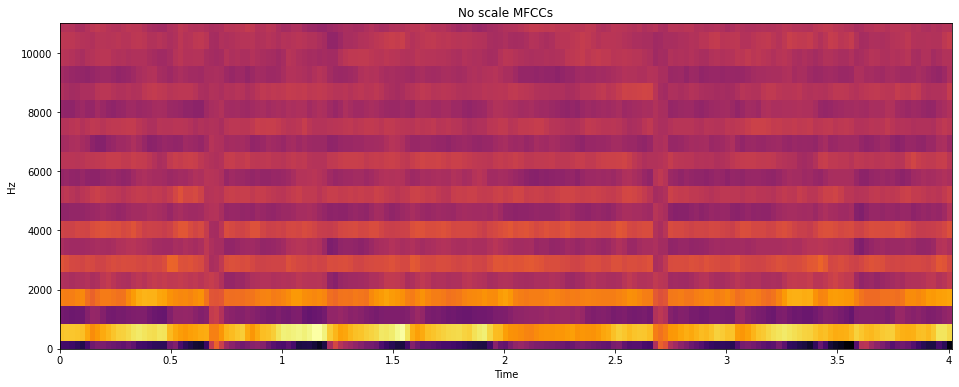

In [107]:
mfccs = librosa.feature.mfcc(y, sr=sr)
print(mfccs.shape)

plt.figure(figsize=(16, 6))
plt.title("No scale MFCCs")
lplt.specshow(mfccs, sr=sr, x_axis='time', y_axis='linear', cmap='inferno')

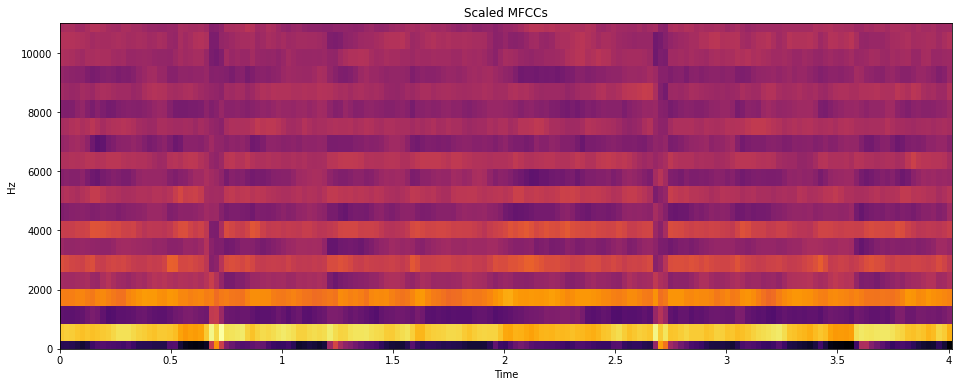

In [108]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
mfccs_scaled = scaler.fit_transform(mfccs)

plt.figure(figsize=(16, 6))
plt.title("Scaled MFCCs")
lplt.specshow(mfccs_scaled, sr=sr, x_axis='time', y_axis='linear', cmap='inferno')
_ = plt.show()




### Spectral Centroid
+ Indicates where the 'centre of mass' for a sound is located and is calculated as the weighted mean of the frequencies present in the sound.

Centroids mean: 2152.012519699322
Centroids var: 197807.38446395096
Shape of Spectral Centroids: (173,) 



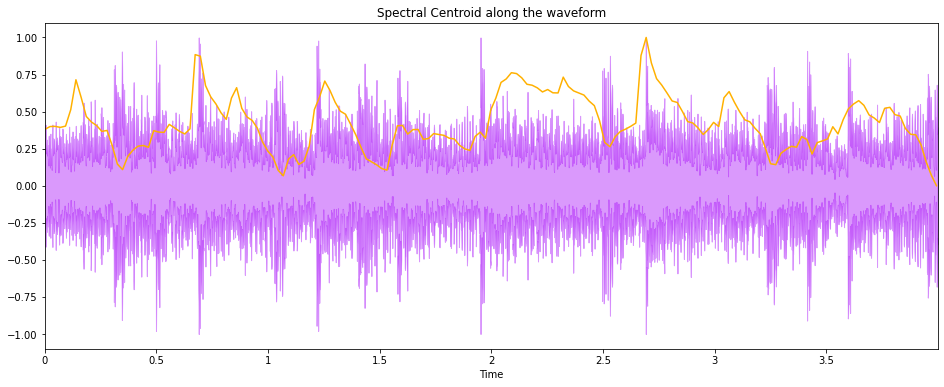

In [102]:
from sklearn.preprocessing import minmax_scale

# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]

# Shape is a vector
print('Centroids mean:', np.mean(spectral_centroids))
print('Centroids var:', np.var(spectral_centroids))
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

plt.figure(figsize=(16, 6))
plt.title('Spectral Centroid along the waveform')
lplt.waveplot(y, sr=sr, alpha=0.4, color='#A300F9')
plt.plot(t, minmax_scale(spectral_centroids), color='#FFB100')
_ = plt.show()


# Features extraction

In [60]:
import librosa

def get_key_features(audio_file):
    audio = librosa.load(audio_file)
    tempo = librosa.beat.beat_track